In [15]:

import torch                        # import torch module
import torch.nn as nn               # import torch.nn module
import numpy as np                  # import numpy as np 
import cv2                          # import opencv2 library to generate images from trained model
import matplotlib.pyplot as plt     # import matplot to plot the images

# configure GPU
ngpu=1
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print(device)



cuda:0


In [16]:
#load the generator class before loading the model
nz=100
ngf=32
nc=3
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
          # Layer 1
            #nn.ConvTranspose2d(input features, output features, kernel size, stride, padding, enable or disable bias),
            nn.ConvTranspose2d(nz, ngf * 32, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 32), # batch normalization layer 
            nn.SELU(inplace=True), # activation layer 
            # Layer 2
            nn.ConvTranspose2d(ngf * 32 , ngf * 16, 4, 3, 0, bias=False),
            nn.BatchNorm2d(ngf * 16),
            nn.SELU(inplace=True),
            # Layer 3
            nn.ConvTranspose2d(ngf * 16, ngf * 8, 4, 3, 0, bias=False),
            nn.BatchNorm2d(ngf * 8 ),
            nn.SELU(inplace=True),
            # Layer 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 3, 0, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.SELU(inplace=True),
            # Layer 5
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 3, 0, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.SELU(inplace=True),
            # Layer 6
            nn.ConvTranspose2d(ngf * 2, ngf , 4, 2, 0, bias=False),
            nn.BatchNorm2d(ngf),
            nn.SELU(inplace=True),
            # Layer 7 
            nn.ConvTranspose2d( ngf, nc, 4, 2, 0, bias=False),
            nn.Tanh()   # tanh activation in the last layer 
        )

    def forward(self, input):
        return self.main(input)


In [18]:
# load the variable with generator class
model=Generator(ngpu).to(device)
# load the saved model and laod the state dict to the model
model=torch.load('trainedModels/1536_G.pt')

In [27]:
# function to generate images from saved models
def generateImage(model,nz,num):
    #generate the noise vector
    noiseVector=torch.randn(num,nz,1,1,device=device)
    # forward pass the noise vector to generator to generate the image
    genImage=model(noiseVector)
    # move the image from GPU memory to CPU memory
    fakeImage=genImage.detach().cpu()
    # covert the image tensor to numpy
    image_np=fakeImage[0].numpy()
    # reshape the image to plot 
    image_transpose=np.transpose(image_np,(1,2,0))
    # scale the image from [-1,1] range to [0,255] range to plot in RGB format
    image_scale=cv2.normalize(image_transpose, None, alpha=0, beta=1,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    # resize the image to required 1536 X 1536
    resizeImage=cv2.resize(image_scale,(1536,1536))
    # return the resized image
    return resizeImage

Shape of Generated Image: (1536, 1536, 3)


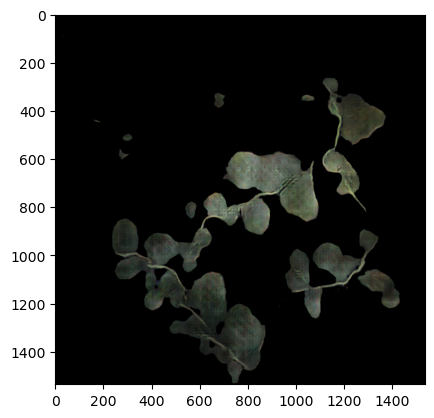

In [26]:
# genrate the image from function 
generatedImage=generateImage(model,100,1)
# plot the generated image
plt.imshow(generatedImage)
# print the dimension of the generated Image
print(f'Shape of Generated Image: {generatedImage.shape}')